# **Problem Statement: is to use seismic signals to predict the timing of laboratory earthquakes. The data comes from a well-known experimental set-up used to study earthquake physics.**

## **Features:**
A) Indepedent variables: 
1) acoustic_data - the seismic signal [int16]
2) time_to_failure - the time (in seconds) until the next laboratory earthquake [float64]

B) Dependant variable: 
1) seg_id - the test segment ids for which predictions should be made (one prediction per segment)


## Import Libraries: 

In [1]:
import os #for interaction with the operating system
import numpy as np #linear algebra
import pandas as pd #data analysis & manipulation
import seaborn as sns #visualisation tool
%matplotlib inline
import matplotlib.pyplot as plt #visualisation tool




In [2]:
# When you have data with main node, subnodes and the baby nodes, os.walk function helps you create a tree of the directory
# that will create a tuple and read the data in the same manner
for dirname, _, filenames in os.walk('/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_51f0a2.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_de98fa.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_ad82ca.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_e3ca24.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_64f8dc.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_e6c973.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_88b289.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_8c1e7d.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_b7a8a1.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_18096a.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_7f5b6f.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_d753f8.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_55239a.csv
/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/seg_7a9f2b.csv
/Users/sheeba/Desktop/LANL-Earthqu

## Loading the data:

In [3]:
# To increase the output of the print for better clarity #
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns',600)
pd.set_option('display.width', 1200) 

In [4]:
# Setting a working directory # 
os.chdir('/Users/sheeba/Desktop/LANL-Earthquake-Prediction/')

In [5]:
# The data here is read is the training data
train=pd.read_csv('train.csv',nrows=6000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

## EDA and Data Visualisation

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int16  
 1   time_to_failure  float64
dtypes: float64(1), int16(1)
memory usage: 57.2 MB


In [7]:
train.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [8]:
#Checking the missing values
train.isna().sum()

acoustic_data      0
time_to_failure    0
dtype: int64

In [9]:
train.describe()

,acoustic_data,time_to_failure
count,6.000000e+06,6.000000e+06
mean,4.545660e+00,1.350958e+00
std,2.277303e+01,2.533610e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,3.902964e-01
50%,5.000000e+00,7.796974e-01
75%,7.000000e+00,1.169098e+00
max,3.252000e+03,1.154080e+01


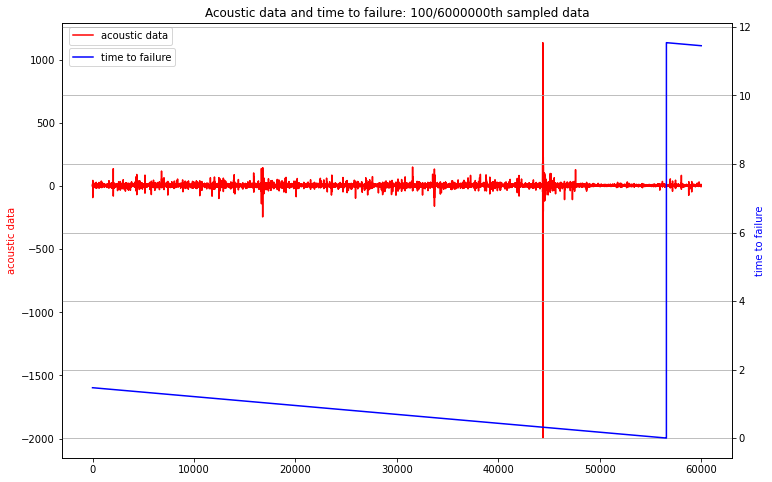

In [10]:
# Trying to visualise the first 100 rows of a 6 million rows of the data.

train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

import matplotlib.pyplot as plt

#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 100/6000000th sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

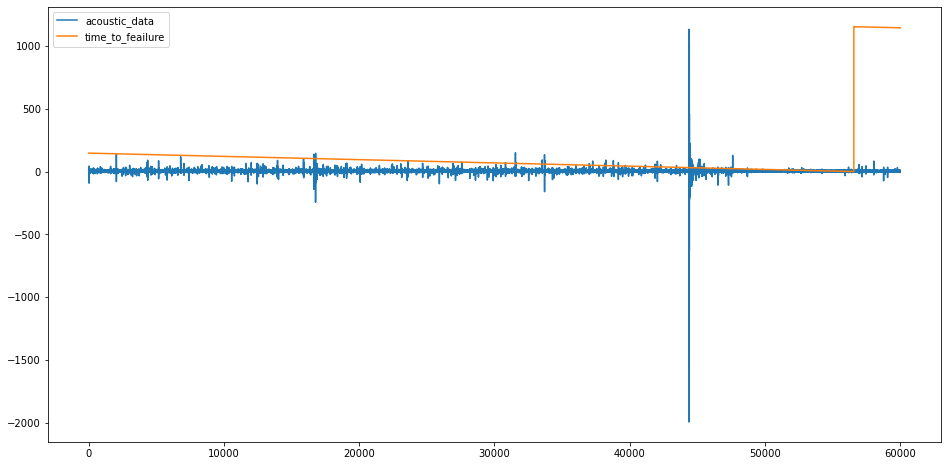

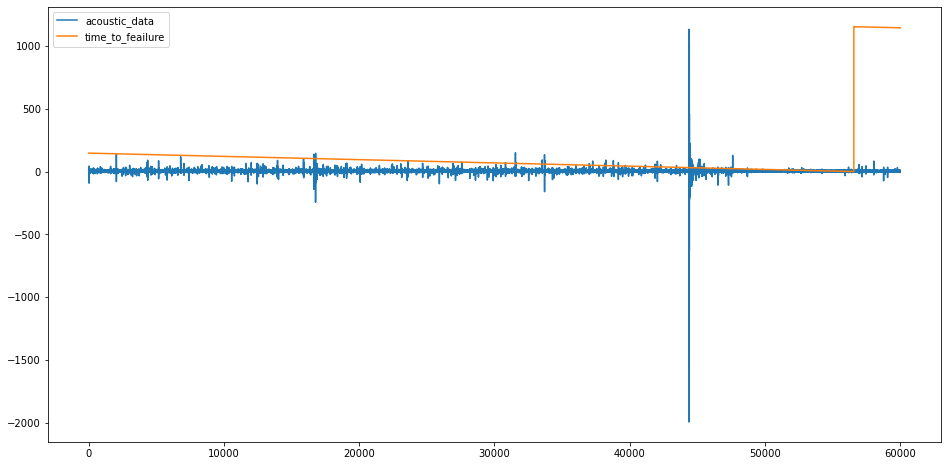

8838

In [11]:
import gc
train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

data = train['acoustic_data'].values[::200]
ttf = train['time_to_failure'].values[::200]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(train_ad_sample_df, label='acoustic_data')
ax.plot(train_ttf_sample_df * 100, label='time_to_feailure')
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(train_ad_sample_df[:200000], label='acoustic_data')
ax.plot(train_ttf_sample_df[:200000] * 100, label='time_to_feailure')
plt.legend()
plt.show()

del train_ad_sample_df
del train_ttf_sample_df
gc.collect()

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


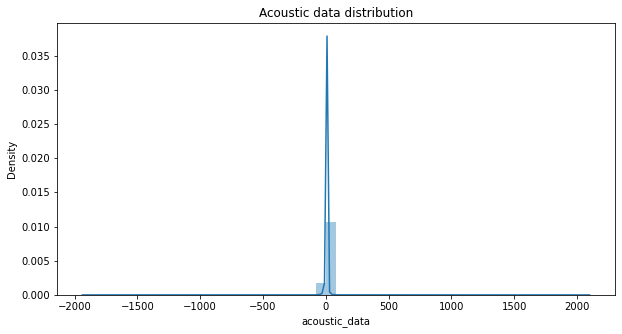

In [12]:
train_sample = train.sample(frac=0.01) 
plt.figure(figsize=(10,5)) 
plt.title("Acoustic data distribution") 
ax = sns.distplot(train_sample.acoustic_data, label='Train (1% sample)')

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


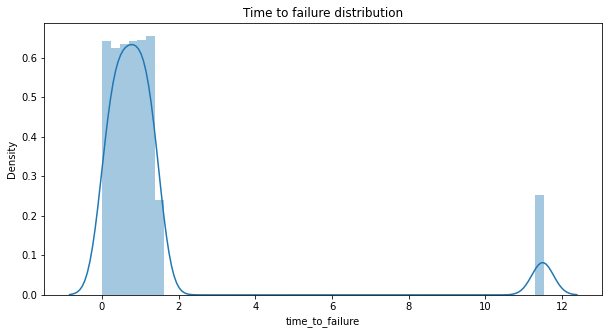

In [13]:
train_sample = train.sample(frac=0.01) 
plt.figure(figsize=(10,5)) 
plt.title("Time to failure distribution") 
ax = sns.distplot(train_sample.time_to_failure, label='Train (1% sample)')

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


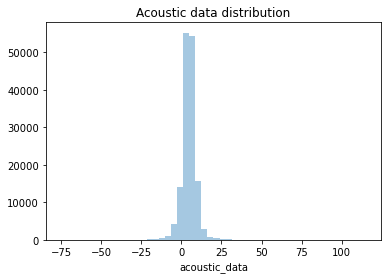

In [14]:
pd.set_option("display.precision", 4) 
test1 = pd.read_csv('test/seg_00030f.csv', dtype='int16') 
plt.title("Acoustic data distribution") 
ax = sns.distplot(test1.acoustic_data, label='seg_37669c', kde=False)

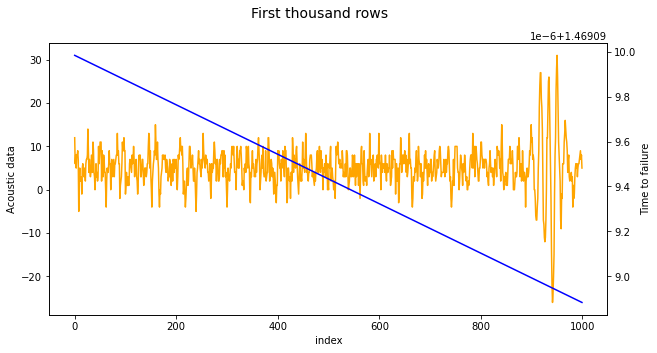

In [15]:
def single_timeseries(final_idx, init_idx=0, step=1, title="T",color1='orange', color2='blue'):
    idx = [i for i in range(init_idx, final_idx, step)] 
    fig, ax1 = plt.subplots(figsize=(10, 5))
    fig.suptitle(title, fontsize=14) 
    ax2 = ax1.twinx() 
    ax1.set_xlabel('index') 
    ax1.set_ylabel('Acoustic data') 
    ax2.set_ylabel('Time to failure') 
    p1 = sns.lineplot(data=train.iloc[idx].acoustic_data.values, ax=ax1, color=color1) 
    p2 = sns.lineplot(data=train.iloc[idx].time_to_failure.values, ax=ax2, color=color2) 

def double_timeseries(final_idx1, final_idx2, init_idx1=0, init_idx2=0, step=1, title="Y"): 
    idx1 = [i for i in range(init_idx1, final_idx1, step)] 
    idx2 = [i for i in range(init_idx2, final_idx2, step)] 
    fig, (ax1a, ax2a) = plt.subplots(1,2, figsize=(12,5))
    fig.subplots_adjust(wspace=0.4) 
    ax1b = ax1a.twinx() 
    ax2b = ax2a.twinx() 
    ax1a.set_xlabel('index') 
    ax1a.set_ylabel('Acoustic data') 
    ax2a.set_ylabel('Time to failure') 
    p1 = sns.lineplot(data=train.iloc[idx1].acoustic_data.values,ax=ax1a, color='orange')
    p2 = sns.lineplot(data=train.iloc[idx1].time_to_failure.values, ax=ax1b, color='blue')
    p3 = sns.lineplot(data=train.iloc[idx2].acoustic_data.values, ax=ax2a, color='orange') 
    p4 = sns.lineplot(data=train.iloc[idx2].time_to_failure.values, ax=ax2b, color='blue') 

single_timeseries(1000, title="First thousand rows")

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


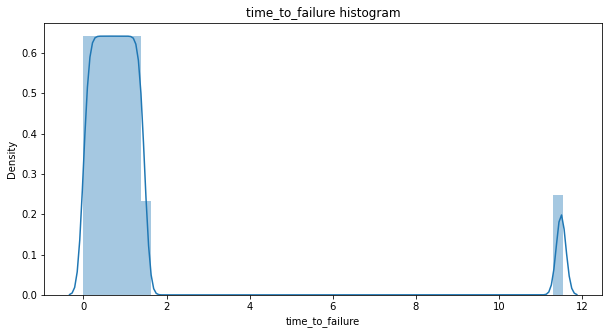

In [16]:
plt.figure(figsize=(10,5))
plt.title("time_to_failure histogram")
ax = sns.distplot(train["time_to_failure"], label='time_to_failure')

In [18]:
train.shape

(6000000, 2)

## Feature Engineering: 

In [20]:
# Since there are only 6 million columns and 2 rows that may likely result in a poor model, we add additional 
# engineered features to the data to enhance the model


In [19]:
def gen_features(X):
    features = []
    features.append(X.mean())
    features.append(X.std())
    features.append(X.min())
    features.append(X.max())
    features.append(X.kurtosis())
    features.append(X.skew())
    features.append(np.quantile(X,0.01))
    features.append(np.quantile(X,0.05))
    features.append(np.quantile(X,0.95))
    features.append(np.quantile(X,0.99))
    features.append(np.abs(X).max())
    features.append(np.abs(X).mean())
    features.append(np.abs(X).std())
    return pd.Series(features)

In [20]:
# Creating a smaller chunk size to interate
train = pd.read_csv('train.csv', iterator=True, chunksize=150_000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [21]:
X_train=pd.DataFrame()
y_train = pd.Series(dtype='float64') 

In [25]:
for df in train:
    ch = gen_features(df['acoustic_data'])
    X_train = X_train.append(ch, ignore_index=True)
    y_train = y_train.append(pd.Series(df['time_to_failure'].values[-1]))

In [26]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000,4195.0000
mean,4.5195,6.5478,-149.1909,163.5223,68.2980,0.1258,-11.2246,-2.1848,11.2317,20.3219,170.0462,5.5474,5.7502
std,0.2560,8.5039,265.0880,272.9303,70.5326,0.4779,14.1069,2.3466,2.3581,14.2255,296.8870,1.5170,8.3392
min,3.5963,2.8027,-5515.0000,23.0000,0.6486,-4.0918,-336.0000,-39.0000,9.0000,11.0000,23.0000,4.1477,2.5891
25%,4.3495,4.4786,-154.0000,92.0000,28.0902,-0.0408,-14.0000,-3.0000,10.0000,15.0000,94.0000,5.0618,3.8628
50%,4.5221,5.6188,-111.0000,123.0000,45.8166,0.0856,-10.0000,-2.0000,11.0000,19.0000,127.0000,5.3809,4.7815
75%,4.6934,6.8809,-79.0000,170.0000,78.6642,0.2539,-6.0000,-1.0000,12.0000,23.0000,175.0000,5.7486,5.8879
max,5.3920,153.7036,-15.0000,5444.0000,631.1589,4.2194,-2.0000,0.0000,50.0000,337.0000,5515.0000,32.7621,150.4324


## Model Building: 

Model 1: Catboost

The model of Catboost is built on the decision trees and boosting. The method of boostingis to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model. With the sequential fitting of the decision trees through boosting, it minimises the error by improvising on the previous mistakes

In [27]:
# Importing the relevant libraries
from catboost import CatBoostRegressor, Pool


In [36]:
train_pool = Pool(X_train, y_train)
m = CatBoostRegressor(iterations=10000, loss_function='MAE', boosting_type='Ordered')
m.fit(X_train, y_train, silent=True)
catboost_mae=m.best_score_


Model Evaluation

In [37]:
catboost_mae #Catboost gives the MAE of ~1.38

{'learn': {'MAE': 1.3776750114110539}}

Model 2: SVR

When the main purpose of regression problems is to find an optimal and workable function that will map all the output values (predictions) from an input domain on basis of a training sample. When you have a non-linear dataset, SVR helps you discover a hyperplane in an n-dimensional space, where n denotes the number of features or independent variables.



In [38]:
# Importing the relevant libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import NuSVR, SVR

In [39]:
#StandardScaler is used to resize the distribution of values 
#so that the mean of the observed values is 0 and the standard deviation is 1. This is done to rescale the values

In [40]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [41]:
# GridSearcgCV is a hypertuning method that helps to loop through predefined hyperparameters and 
# fit your estimator (model) on your training set. For SVR, 'C' is a hyperparameter to control error
# and Gamma helps decide that how much curvature we want in a decision boundary.
# Here, you are tuning with given paramaters which after looping, you crossvalidate and 
# find the best possible hyperparameters

parameters = [{'gamma': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
               'C': [0.1, 0.2, 0.25, 0.5, 1, 1.5, 2]}]
               #'nu': [0.75, 0.8, 0.85, 0.9, 0.95, 0.97]}]
reg1 = GridSearchCV(SVR(kernel='rbf', tol=0.01), parameters, cv=5, scoring='neg_mean_absolute_error')
reg1.fit(X_train_scaled, y_train.values.flatten())
y_pred1 = reg1.predict(X_train_scaled)


Model Evaluation: 

In [42]:
from sklearn.metrics import mean_absolute_error
    
y_pred = reg1.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
print('%.5f' % mae) # SVR gives an MAE of ~2.09

2.09421


## Preparing the test data

In [43]:
submission = pd.read_csv('sample_submission.csv', index_col='seg_id')
X_test = pd.DataFrame() #the smaller files within the test data are stored in a single file along with generating features
# and feature scaling

# Preparing the test data
for seg_id in submission.index:
    seg = pd.read_csv('/Users/sheeba/Desktop/LANL-Earthquake-Prediction/test/' + seg_id + '.csv')
    ch = gen_features(seg['acoustic_data'])
    X_test = X_test.append(ch, ignore_index=True)

In [44]:
# Feature Scaling the test data

X_test = scaler.transform(X_test)

**Since the model of Catboost does better than SVR, of giving us an MAE of 1.38 in comparision to 2.09, the model of choice here is the Catboost model.**

In [45]:
# Using the Catboost model, predicting on the test data:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],)
y_hat = m.predict(X_test)

## Submission

In [46]:

submission['time_to_failure'] = y_hat
submission.to_csv('submission_1.csv')